Şuana kadar öğrendiğimiz algoritmalar ile , birbirine çok yakın ufak şekiller olunca arka plandan ayırırken onları tespit etmek zor, tek bir obje gibi birleştiriyor onları.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')

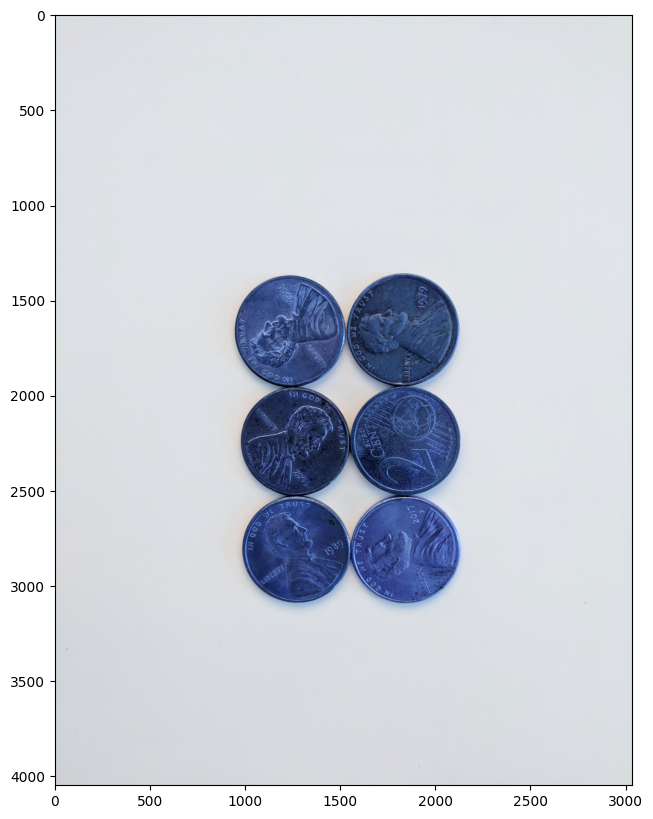

In [4]:
display(sep_coins)

In [5]:
# Median Blur (yüzleri vs yok etmek için gereksiz noiselere)
# Gray Scale yapacağız.
# Binary Threshold
# Find Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

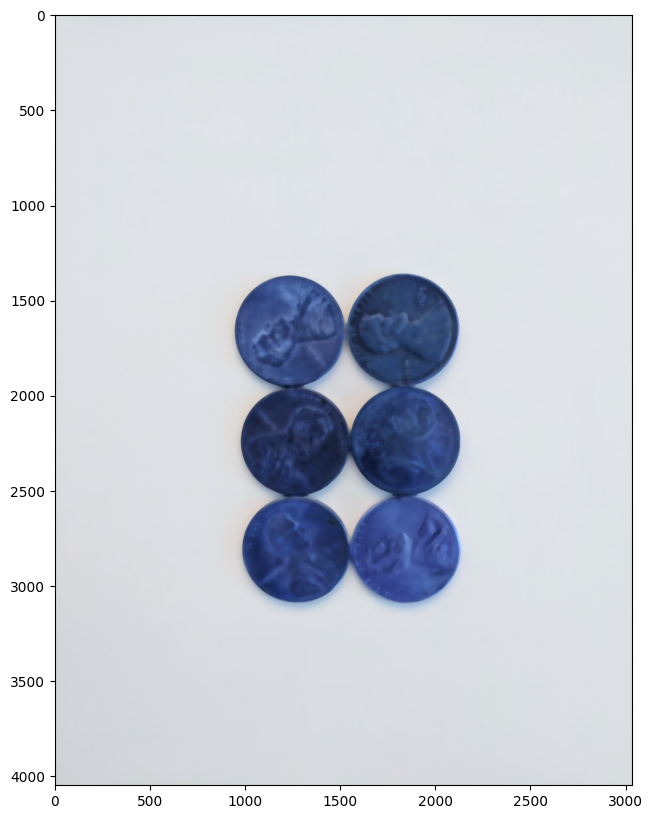

In [7]:
display(sep_blur)

In [8]:
gray_Sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

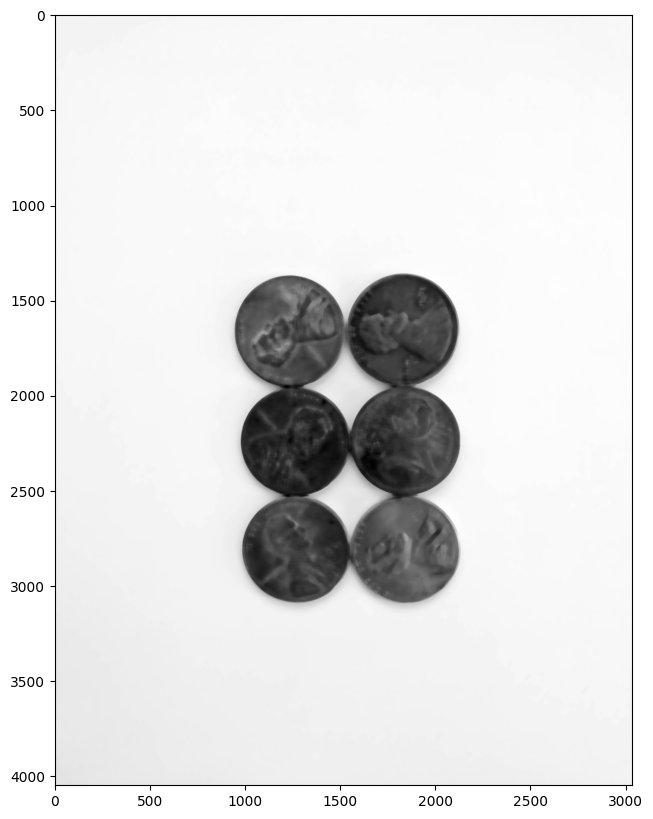

In [9]:
display(gray_Sep_coins)

In [10]:
ret, sep_thres = cv2.threshold(gray_Sep_coins,150,255,cv2.THRESH_BINARY_INV)

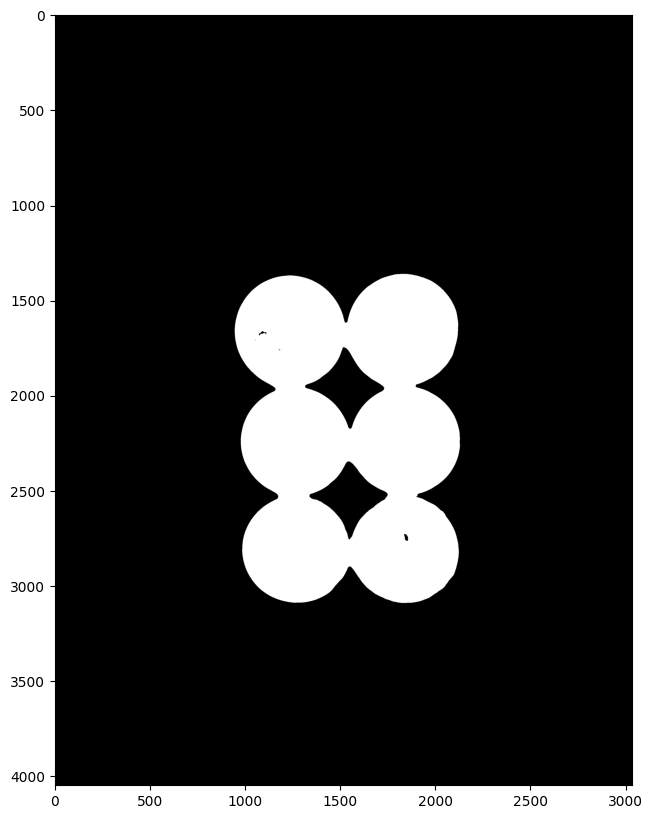

In [ ]:
display(sep_thres) #Coinleri bağladı birbirine. 

Buradan sonra watershed algorithm kullanacağız.

STEP STEP GİDİYORUZ

In [13]:
img = cv2.imread('DATA/pennies.jpg')

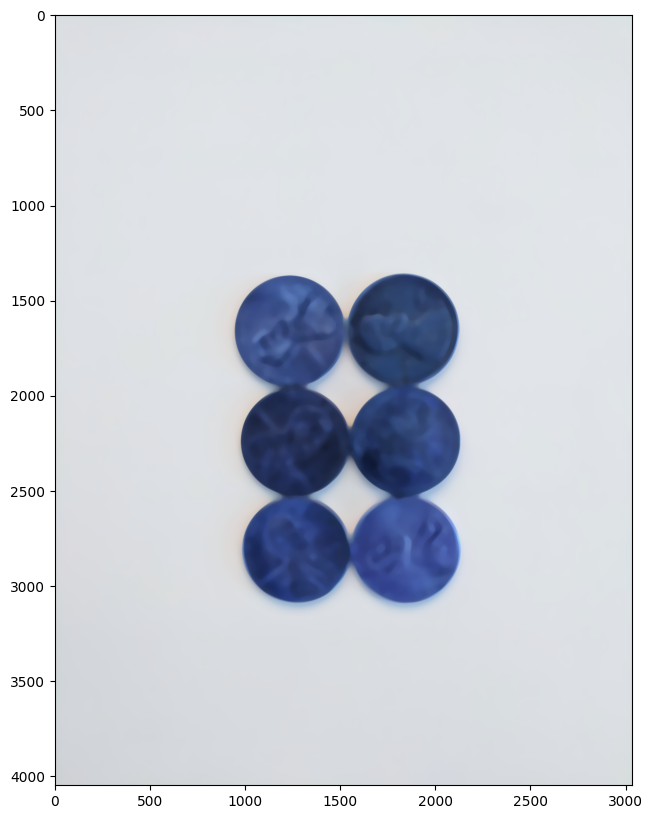

In [15]:
img = cv2.medianBlur(img,35) #blur attık.
display(img)


In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #gray scale yaptık

In [ ]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # BİNARY ÜSTÜNE ekstra otsu threshold attık.

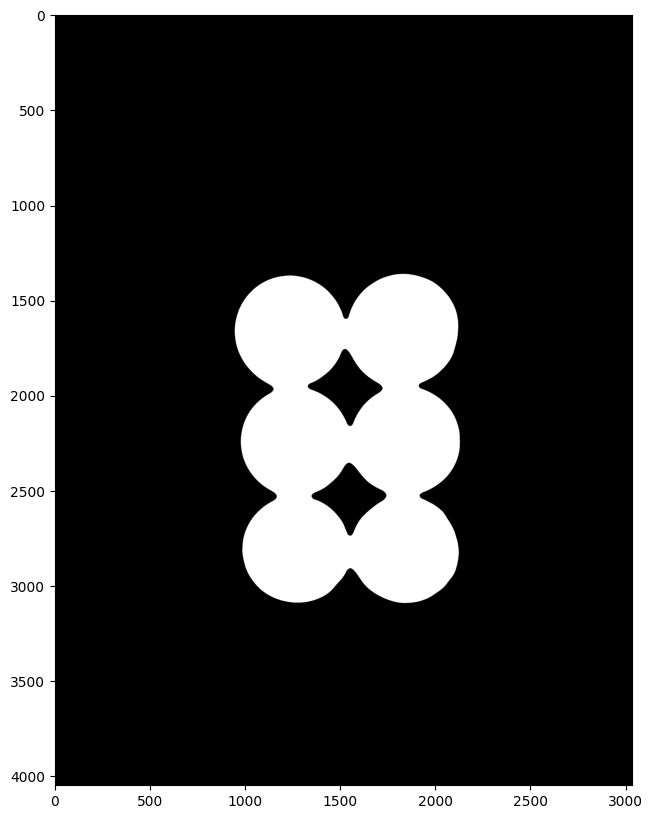

In [18]:
display(thresh)

In [ ]:
# distance transform yapacağız
kernel = np.ones((3,3),np.uint8)
sure_background = cv2.dilate(thresh,kernel,iterations=3) 
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)


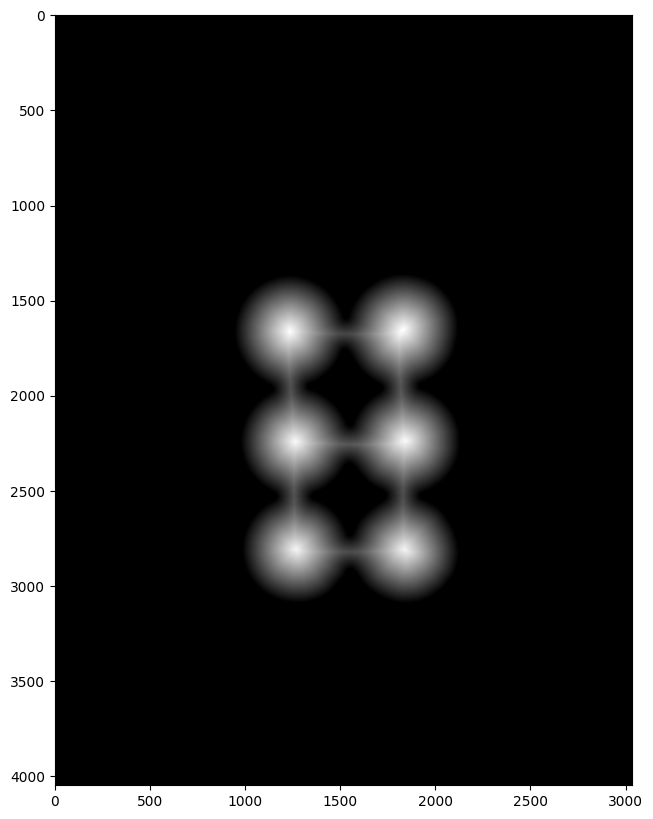

In [29]:
display(dist_transform)

In [30]:
ret,sure_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

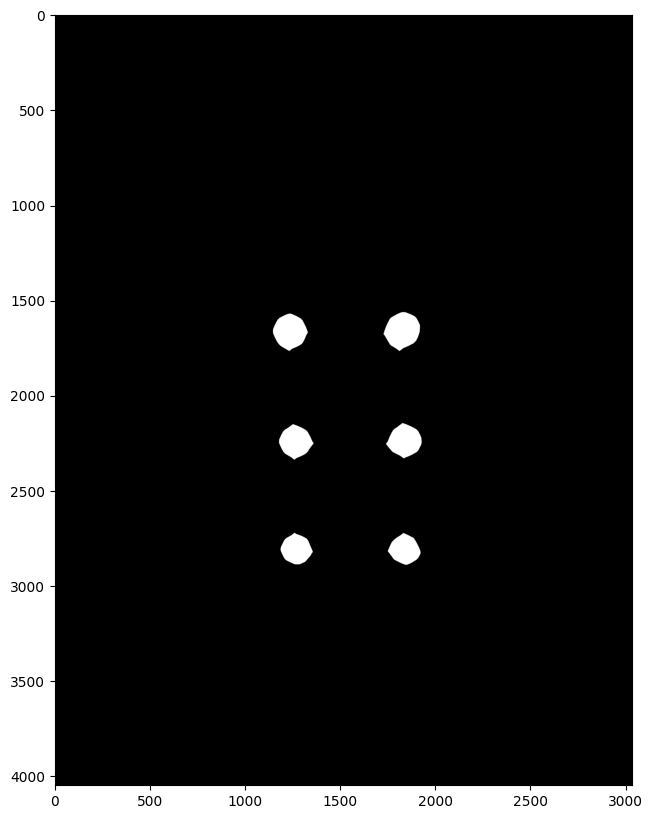

In [31]:
display(sure_foreground)

In [32]:
sure_foreground = np.uint8(sure_foreground)

In [33]:
unknown = cv2.subtract(sure_background,sure_foreground)

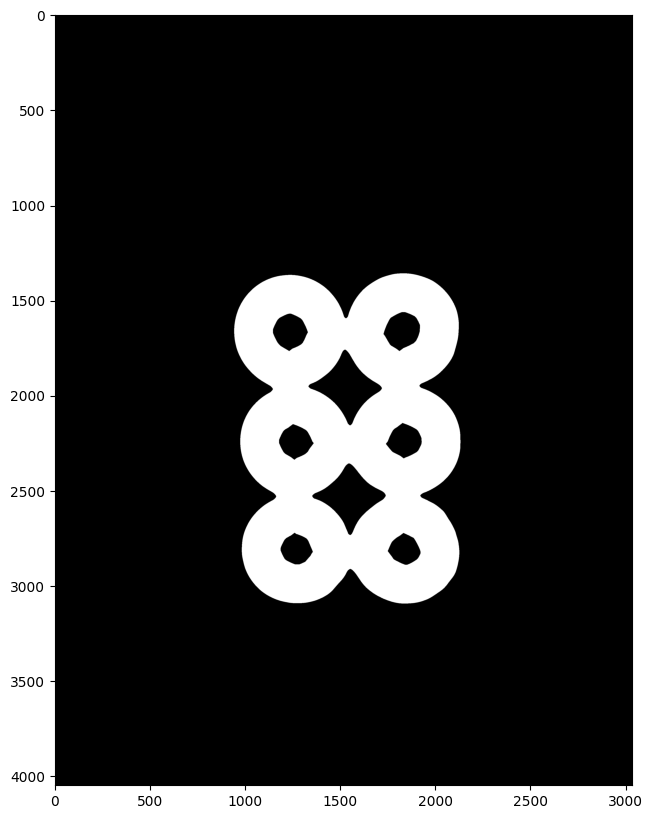

In [ ]:
display(unknown) # tam arka plan mı değil mi bilmiyoruz, label marker yapıp seed olarak kullanacağız, watershed için.

In [36]:
ret, markers = cv2.connectedComponents(sure_foreground)

In [38]:
markers = markers + 1

In [39]:
markers[unknown==255]= 0 

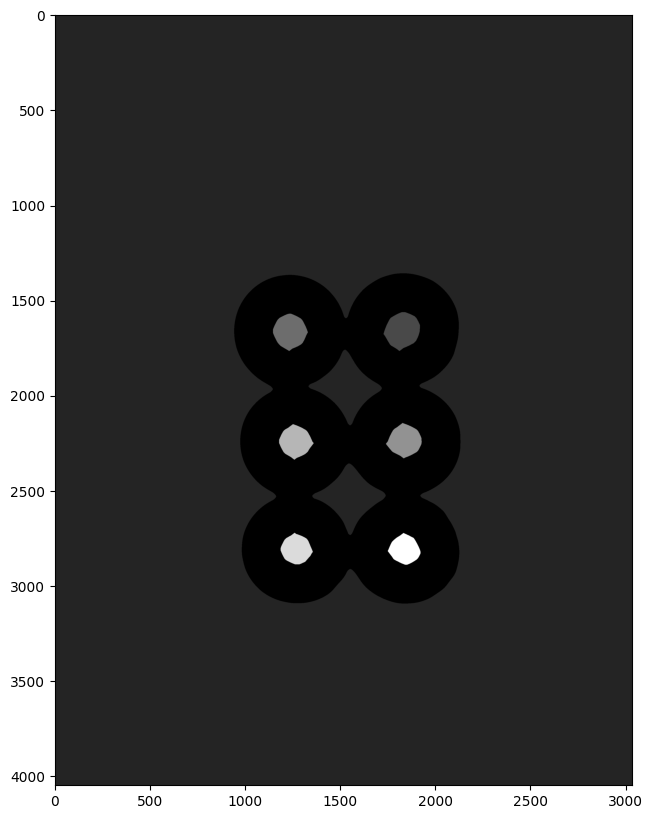

In [41]:
display(markers) #Markerları seçtik orta noktası ve arkaplan için watershed için.

In [42]:
markers = cv2.watershed(img,markers)

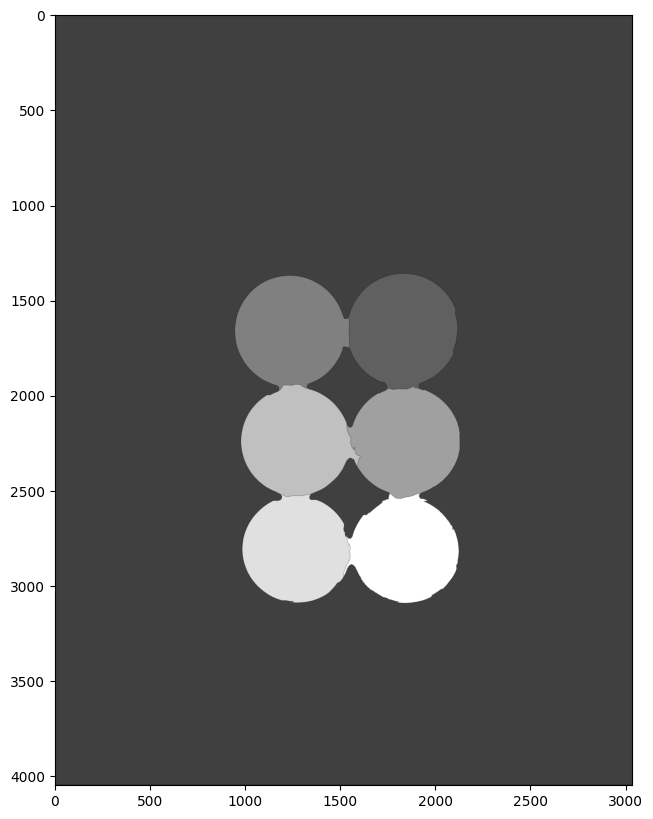

In [44]:
display(markers) # farklı olanları bulabildi